
# 🏋️‍♂️ Health and Fitness Data Analysis with NumPy & Seaborn

## 🎯 Objective:
Analyze health and activity data to explore how sleep, activity, and other habits affect health using:
- **Pandas** for data handling
- **NumPy** for numerical analysis
- **Seaborn** for visualization


In [5]:

import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\abdul\Downloads\Health_and_Fitness_Dataset.csv")

# Preview data
df.head()

,UserID,Date,Steps,SleepHours,CaloriesBurned,ActiveMinutes,HeartRate
0,1,2025-03-01,8493.0,5.3,293.73,91.0,84.1
1,1,2025-03-02,7223.0,5.7,321.03,40.0,58.7
2,1,2025-03-03,8795.0,7.6,390.50,79.7,71.1
3,1,2025-03-04,10546.0,7.4,451.61,55.7,72.8
4,1,2025-03-05,7031.0,6.5,308.51,59.0,65.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserID          300 non-null    int64  
 1   Date            300 non-null    object 
 2   Steps           294 non-null    float64
 3   SleepHours      294 non-null    float64
 4   CaloriesBurned  300 non-null    float64
 5   ActiveMinutes   300 non-null    float64
 6   HeartRate       294 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 16.5+ KB


In [9]:
df.describe()

,UserID,Steps,SleepHours,CaloriesBurned,ActiveMinutes,HeartRate
count,300.000000,294.000000,294.000000,300.000000,300.000000,294.000000
mean,15.500000,7482.700680,6.440476,298.163733,63.569333,69.145578
std,8.669903,1981.670812,1.431756,91.304135,19.001364,10.417007
min,1.000000,1017.000000,3.000000,31.840000,20.000000,50.000000
25%,8.000000,6099.750000,5.400000,237.485000,50.175000,61.525000
50%,15.500000,7618.000000,6.450000,287.025000,64.050000,69.600000
75%,23.000000,8744.000000,7.400000,347.267500,75.475000,76.600000
max,30.000000,15205.000000,10.000000,606.830000,110.500000,97.000000


In [11]:
df.isnull().sum()

UserID            0
Date              0
Steps             6
SleepHours        6
CaloriesBurned    0
ActiveMinutes     0
HeartRate         6
dtype: int64

In [13]:
df_clean = df.dropna()

In [15]:
df_clean.head()

,UserID,Date,Steps,SleepHours,CaloriesBurned,ActiveMinutes,HeartRate
0,1,2025-03-01,8493.0,5.3,293.73,91.0,84.1
1,1,2025-03-02,7223.0,5.7,321.03,40.0,58.7
2,1,2025-03-03,8795.0,7.6,390.50,79.7,71.1
3,1,2025-03-04,10546.0,7.4,451.61,55.7,72.8
4,1,2025-03-05,7031.0,6.5,308.51,59.0,65.6


In [17]:

import numpy as np

steps = df_clean['Steps'].to_numpy()
sleep = df_clean['SleepHours'].to_numpy()
heart_rate = df_clean['HeartRate'].to_numpy()

print("Average Steps:", np.mean(steps))
print("Std Dev Sleep:", np.std(sleep))

Average Steps: 7477.6077738515905
Std Dev Sleep: 1.4244431175052423


In [19]:
corr = np.corrcoef(sleep, heart_rate)[0, 1]
print("Correlation (Sleep vs HeartRate):", corr)

Correlation (Sleep vs HeartRate): -0.3412459940921067


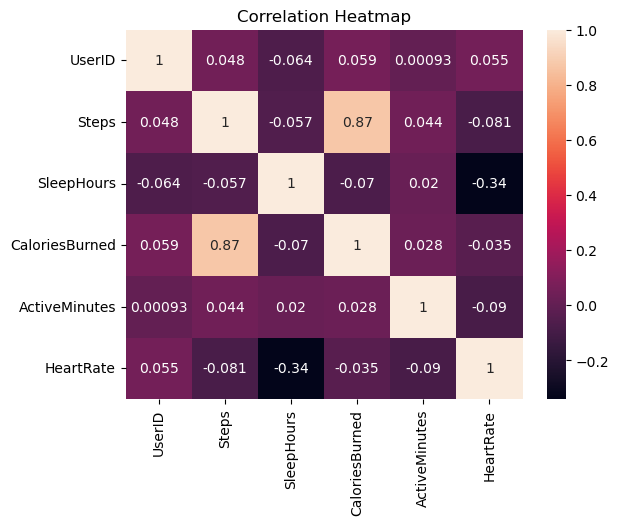

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_clean.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

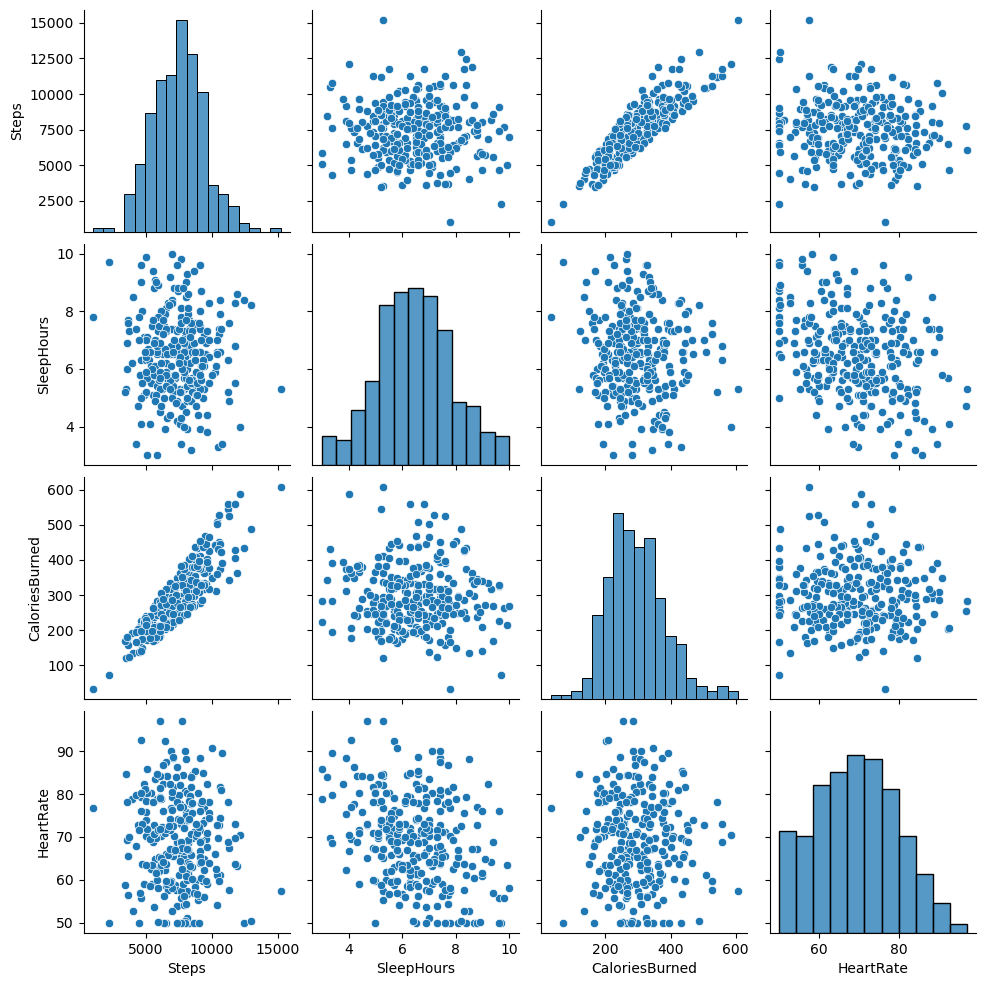

In [23]:
sns.pairplot(df_clean[['Steps', 'SleepHours', 'CaloriesBurned', 'HeartRate']])
plt.show()

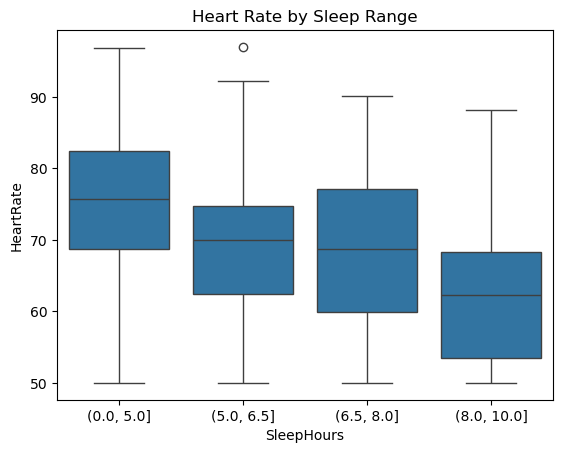

In [25]:
sns.boxplot(x=pd.cut(df_clean['SleepHours'], bins=[0, 5, 6.5, 8, 10]), y='HeartRate', data=df_clean)
plt.title("Heart Rate by Sleep Range")
plt.show()

---

## 🧠 Five Why's Example

**Observation**: "Low sleep leads to higher heart rate"

| Why # | Question | Answer |
|-------|----------|--------|
| 1     | Why is heart rate high? | Due to lack of rest. |
| 2     | Why does lack of rest cause this? | Body is under stress. |
| 3     | Why stress? | No time to recover. |
| 4     | Why no recovery? | Possibly overworking or anxious. |
| 5     | Why that? | Poor work-life balance or routine. |
